<a href="https://colab.research.google.com/github/AbdullahProgrammerX/machine-learning/blob/main/CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Katagorik değişkenler ile otomatik olarak mücadele edebilen GBM türevi

In [3]:
!pip install catboost
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.simplefilter(action='ignore', category=Warning)

df = pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [6]:
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

In [7]:
cv_result = cross_validate(catboost_model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
print(cv_result['test_accuracy'].mean())
print(cv_result['test_f1'].mean())
print(cv_result['test_roc_auc'].mean())

0.7656015037593985
0.6407485394029232
0.8344045584045585


In [8]:
catboost_model.get_params()

{'verbose': False, 'random_state': 17}

In [11]:
catboost_params = {
    'iterations': [200, 300, 500, 1000],
    'learning_rate': [0.01, 0.1],
    'depth': [3, 5, 8]
}

In [24]:
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=10, n_jobs=-1, verbose=True).fit(X, y)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [25]:
catboost_best_grid.best_params_

{'depth': 5, 'iterations': 500, 'learning_rate': 0.01}

In [ ]:
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17, verbose=False).fit(X, y)

In [28]:
cv_result = cross_validate(catboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print(cv_result['test_accuracy'].mean())
print(cv_result['test_f1'].mean())
print(cv_result['test_roc_auc'].mean())

0.7708768355827179
0.6401766057753779
0.8390041928721175


In [31]:
#Feature İmportance Visualization

def plot_importance(model, features, num=len(X), save=False) :
    feature_imp = pd.DataFrame ( {'Value' : model.feature_importances_, 'Feature' : features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                    ascending=False) [0: num])
    plt.title ( 'Features' )
    plt.tight_layout ()
    plt.show ()
    if save:
        plt.savefig('importances.png')


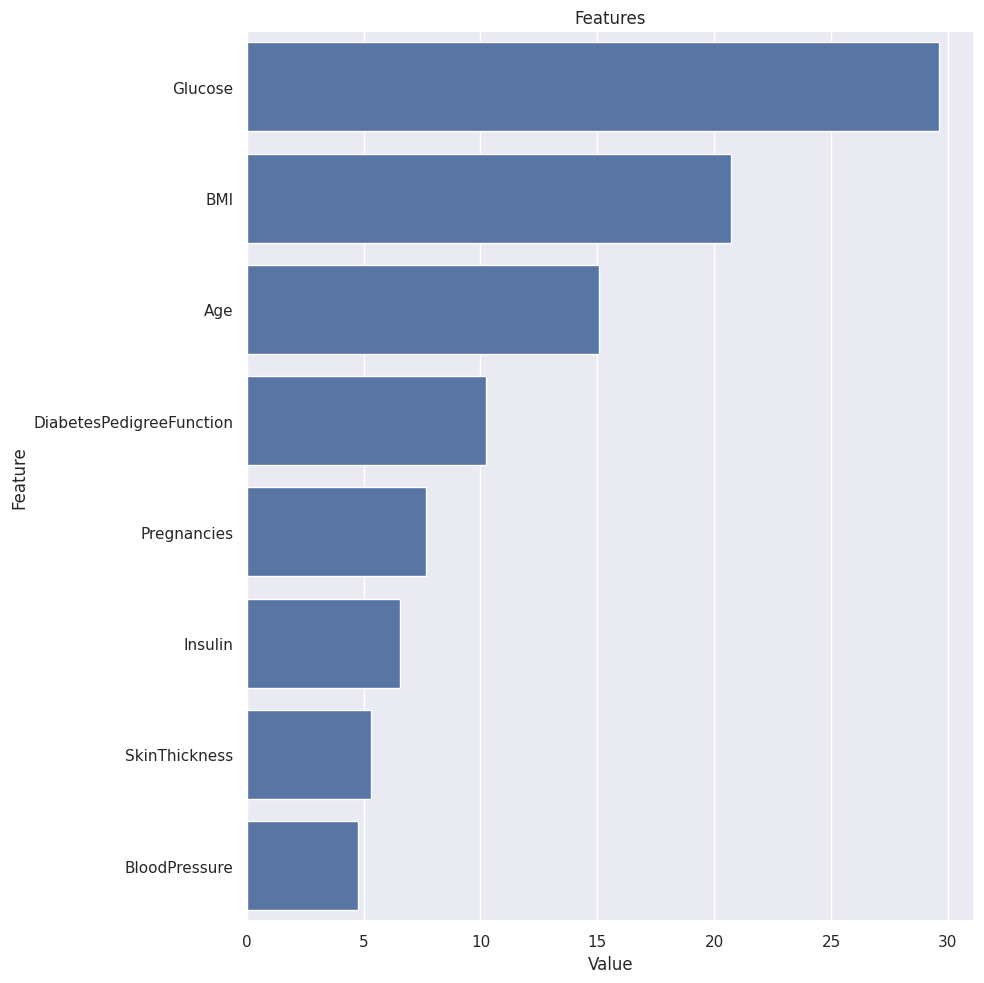

In [32]:
plot_importance(catboost_final, X)